In [1]:
# import libraries
# DataFrame
import pandas as pd

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# sklearny
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB


#tensorflow
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

# Utility
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle

# Loading Dataset

In [2]:
# Construct a tf.data.Dataset
data = pd.read_csv('training.1600000.processed.noemoticon.csv',encoding='latin', names = ['polarity','id','date','query','user','text'])

In [3]:
# Random shuffling of data, select the first 200,000
data = data.sample(frac=1)
data = data[:20000]

# Data Visualization

In [4]:
print("Dataset shape:", data.shape)

Dataset shape: (20000, 6)


In [5]:
data.head(10)

,polarity,id,date,query,user,text
927490,4,1759200889,Sun May 10 18:41:18 PDT 2009,NO_QUERY,smileysavannah,"happy mothers day, i love you mom"
536376,0,2198371889,Tue Jun 16 15:59:16 PDT 2009,NO_QUERY,RicardoSewell,@alice_wonder
1380678,4,2052271765,Sat Jun 06 00:10:56 PDT 2009,NO_QUERY,dylalicious,@hallierina hmmm.... cik kamal ada fierce siki...
1079504,4,1968080912,Fri May 29 20:43:28 PDT 2009,NO_QUERY,araujodany,@KrisAllenmusic http://twitpic.com/68g4z - aww...
23520,0,1557741551,Sun Apr 19 05:47:08 PDT 2009,NO_QUERY,KerryHolder,Neurofen.......i will do anything for neurofen...
1044225,4,1957414763,Fri May 29 00:25:47 PDT 2009,NO_QUERY,ethority,Good morning to all followers!Beautiful sunny ...
195419,0,1970497846,Sat May 30 04:06:21 PDT 2009,NO_QUERY,keren4562,"@tommcfly plz say &quot;Happy Birthday Or , Ro..."
90359,0,1755773624,Sun May 10 09:59:33 PDT 2009,NO_QUERY,DsBabyGirl,@DonnieWahlberg Hey babes!!!!! I'm kickin it &...
895821,4,1692819087,Sun May 03 20:51:36 PDT 2009,NO_QUERY,Accidentaldiva,@HarleyzWorld Just describe the color to me a...
1247649,4,1995593963,Mon Jun 01 13:44:26 PDT 2009,NO_QUERY,AlessaDAngelo,Work Work..CheerDance


In [6]:
data['polarity'].unique()

array([4, 0])

In [7]:
# Replacing the value 4 -->1 for ease of understanding.
data['polarity'] = data['polarity'].replace(4,1)
data.head()

,polarity,id,date,query,user,text
927490,1,1759200889,Sun May 10 18:41:18 PDT 2009,NO_QUERY,smileysavannah,"happy mothers day, i love you mom"
536376,0,2198371889,Tue Jun 16 15:59:16 PDT 2009,NO_QUERY,RicardoSewell,@alice_wonder
1380678,1,2052271765,Sat Jun 06 00:10:56 PDT 2009,NO_QUERY,dylalicious,@hallierina hmmm.... cik kamal ada fierce siki...
1079504,1,1968080912,Fri May 29 20:43:28 PDT 2009,NO_QUERY,araujodany,@KrisAllenmusic http://twitpic.com/68g4z - aww...
23520,0,1557741551,Sun Apr 19 05:47:08 PDT 2009,NO_QUERY,KerryHolder,Neurofen.......i will do anything for neurofen...


In [8]:
data.describe()

,polarity,id
count,20000.000000,2.000000e+04
mean,0.502700,1.999558e+09
std,0.500005,1.934368e+08
min,0.000000,1.467814e+09
25%,0.000000,1.956815e+09
50%,1.000000,2.002304e+09
75%,1.000000,2.177560e+09
max,1.000000,2.329056e+09


In [9]:
# check the number of positive vs. negative tagged sentences
positives = data['polarity'][data.polarity == 1 ]
negatives = data['polarity'][data.polarity == 0 ]

print('Total length of the data is:         {}'.format(data.shape[0]))
print('No. of positve tagged sentences is:  {}'.format(len(positives)))
print('No. of negative tagged sentences is: {}'.format(len(negatives)))

Total length of the data is:         20000
No. of positve tagged sentences is:  10054
No. of negative tagged sentences is: 9946


In [10]:
# get a word count per of text
def word_count(words):
    return len(words.split())

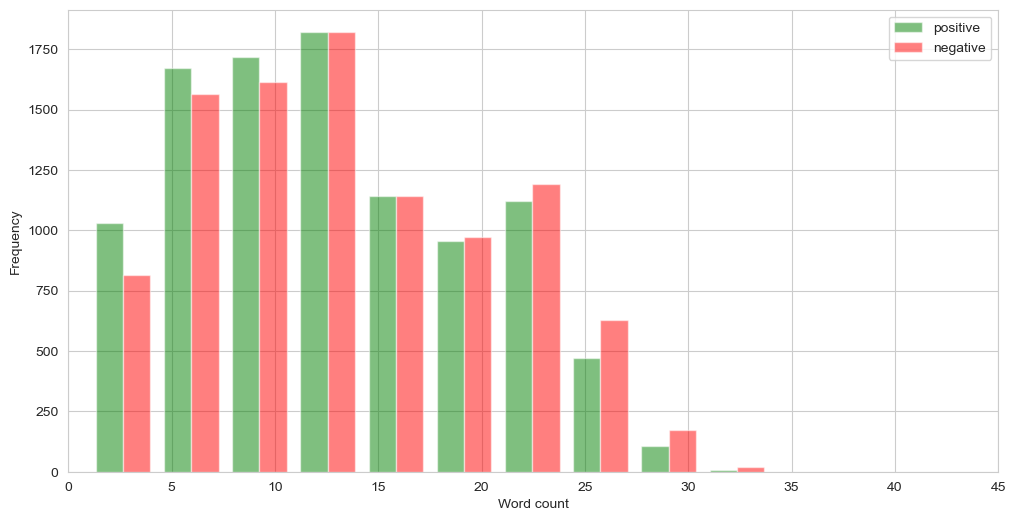

In [11]:
# plot word count distribution for both positive and negative

data['word count'] = data['text'].apply(word_count)
p = data['word count'][data.polarity == 1]
n = data['word count'][data.polarity == 0]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('Word count')
plt.ylabel('Frequency')
g = plt.hist([p, n], color=['g','r'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right')

In [12]:
# get common words in training dataset
from collections import Counter
all_words = []
for line in list(data['text']):
    words = line.split()
    for word in words:
      if(len(word)>2):
        all_words.append(word.lower())


Counter(all_words).most_common(20)

[('the', 6557),
 ('and', 3674),
 ('you', 2935),
 ('for', 2721),
 ('have', 1851),
 ('that', 1596),
 ("i'm", 1584),
 ('just', 1508),
 ('but', 1493),
 ('with', 1418),
 ('not', 1263),
 ('was', 1260),
 ('this', 1106),
 ('get', 1000),
 ('are', 971),
 ('like', 933),
 ('good', 919),
 ('all', 914),
 ('out', 865),
 ('love', 824)]

<Axes: xlabel='polarity', ylabel='count'>

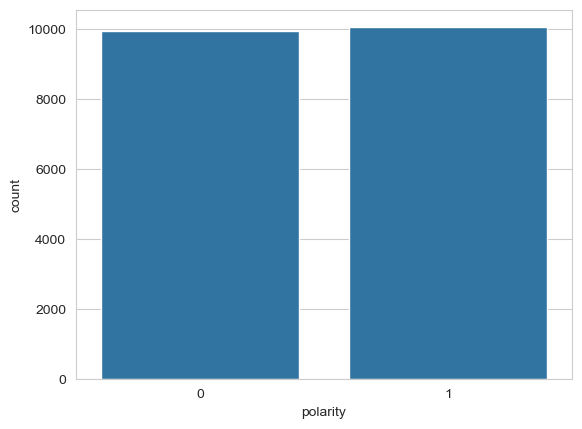

In [13]:
%matplotlib inline
sns.countplot(x=data['polarity'])

# Data Processing
## The Preprocessing steps taken are:
1. Lower Casing: Each text is converted to lowercase.
2. Removing URLs: Links starting with "http" or "https" or "www" are replaced by "".

3. Removing Usernames: Replace @Usernames with word "". (eg: "@XYZ" to "")

4. Removing Short Words: Words with length less than 2 are removed.
5. Removing Stopwords: Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. (eg: "the", "he", "have")
6. Lemmatizing: Lemmatization is the process of converting a word to its base form. (e.g: “wolves” to “wolf”)

In [14]:
# Removing the unnecessary columns.
data.drop(['date','query','user','word count'], axis=1, inplace=True)

In [15]:
data.drop('id', axis=1, inplace=True)
data.head(10)

,polarity,text
927490,1,"happy mothers day, i love you mom"
536376,0,@alice_wonder
1380678,1,@hallierina hmmm.... cik kamal ada fierce siki...
1079504,1,@KrisAllenmusic http://twitpic.com/68g4z - aww...
23520,0,Neurofen.......i will do anything for neurofen...
1044225,1,Good morning to all followers!Beautiful sunny ...
195419,0,"@tommcfly plz say &quot;Happy Birthday Or , Ro..."
90359,0,@DonnieWahlberg Hey babes!!!!! I'm kickin it &...
895821,1,@HarleyzWorld Just describe the color to me a...
1247649,1,Work Work..CheerDance


In [16]:
#Checking if any null values present
(data.isnull().sum() / len(data))*100

polarity    0.0
text        0.0
dtype: float64

In [17]:
#convrting pandas object to a string type
data['text'] = data['text'].astype('str')

In [18]:
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
print(stopword)

{'once', 'into', "wasn't", 'ourselves', "we'd", "he's", "that'll", "couldn't", 'between', "they're", 'yourself', 'but', 'was', 'your', "shan't", 'has', 'ours', 'and', 've', 'theirs', 'when', 'so', 'further', "doesn't", 't', 'him', 'didn', 'hers', 'whom', 'have', "needn't", 'no', 'hadn', 'there', 'she', 'weren', 'out', "wouldn't", 'y', "won't", 'which', 'of', 'down', 'themselves', "it'll", 'about', "she'd", "we're", 'i', "i'm", 'can', 'is', 'himself', 'they', 'to', 'all', 'mightn', 'other', 'those', 'than', "we've", 'don', 'aren', "they've", 'the', 'our', 'just', 'haven', 'nor', 'or', 'their', "hadn't", 'with', 'too', 'these', 'be', "you'd", 'll', 'own', "i've", 'yourselves', 'wasn', 'am', 'doing', 'a', 'until', 'shan', 'if', "it'd", 'my', 'before', 'up', 'an', 'yours', 'he', 'needn', 'me', "don't", 'being', 'as', 'in', 'are', 'does', "she's", 'above', 'how', 'each', 'here', 'same', 're', 'did', 'm', 'won', 'again', 'very', 'isn', 'we', 'then', 'from', 'mustn', 'because', 'most', "mustn

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zhaijingjing/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/zhaijingjing/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zhaijingjing/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/zhaijingjing/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [20]:
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'
def process_tweets(tweet):
  # Lower Casing
    tweet = tweet.lower()
    #tweet=tweet[1:]
    # Removing all URls
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet)
    #Remove punctuations
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(tweet)
    #Removing Stop Words
    #final_tokens = [w for w in tokens if w not in stopword]
    final_tokens = tokens
    #reducing a word to its word stem
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    negation_words = {"not", "no", "never", "n't"}
    prev_neg = False

    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        #finalwords.append(word)
        if word in negation_words:
          prev_neg = True
        elif prev_neg:
          finalwords.append("not_" + word)
          prev_neg = False
        else:
          finalwords.append(word)
    return ' '.join(finalwords)

In [21]:
data['processed_tweets'] = data['text'].apply(lambda x: process_tweets(x))
print('Text Preprocessing complete.')

Text Preprocessing complete.


In [22]:
data.head(10)

,polarity,text,processed_tweets
927490,1,"happy mothers day, i love you mom",happy mother day love you mom
536376,0,@alice_wonder,
1380678,1,@hallierina hmmm.... cik kamal ada fierce siki...,hmmm cik kamal ada fierce sikit dia ada on sik...
1079504,1,@KrisAllenmusic http://twitpic.com/68g4z - aww...,awwwwwn how cute
23520,0,Neurofen.......i will do anything for neurofen...,neurofeni will do anything for neurofen right ...
1044225,1,Good morning to all followers!Beautiful sunny ...,good morning to all followersbeautiful sunny d...
195419,0,"@tommcfly plz say &quot;Happy Birthday Or , Ro...",plz say quothappy birthday or roni amp mickeyq...
90359,0,@DonnieWahlberg Hey babes!!!!! I'm kickin it &...,hey babe im kickin it amp restin up miss you a...
895821,1,@HarleyzWorld Just describe the color to me a...,just describe the color to me and you got it c...
1247649,1,Work Work..CheerDance,work workcheerdance


# Analyzing the data

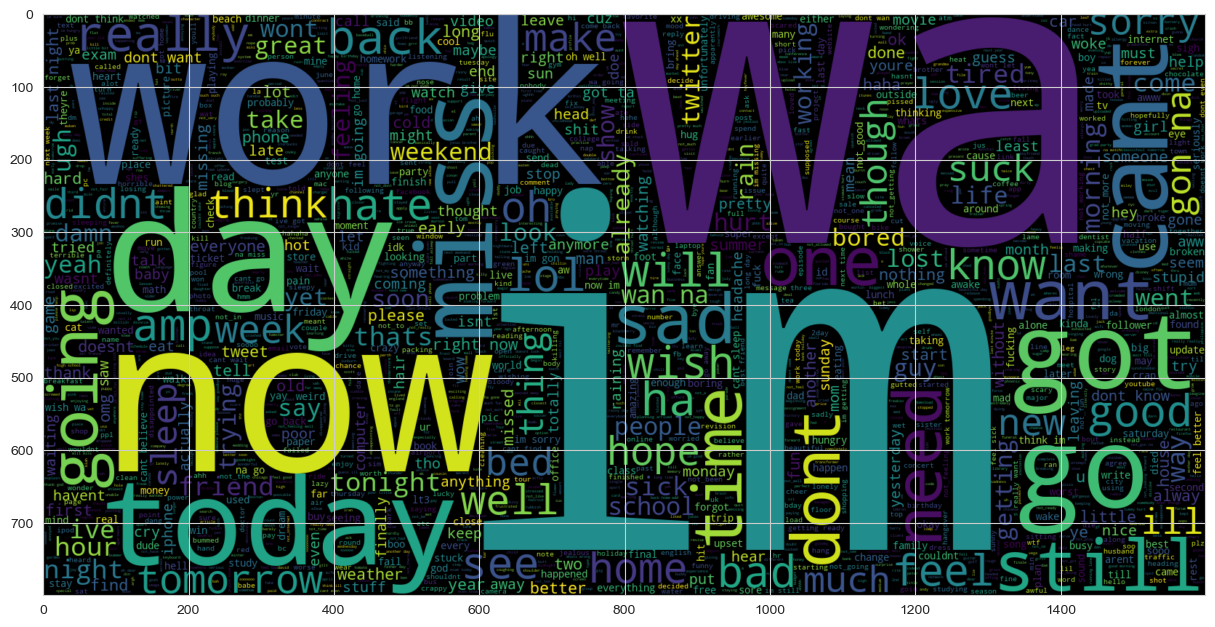

In [23]:
# Word-Cloud for Negative tweets
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.polarity == 0].processed_tweets))
plt.imshow(wc , interpolation = 'bilinear')

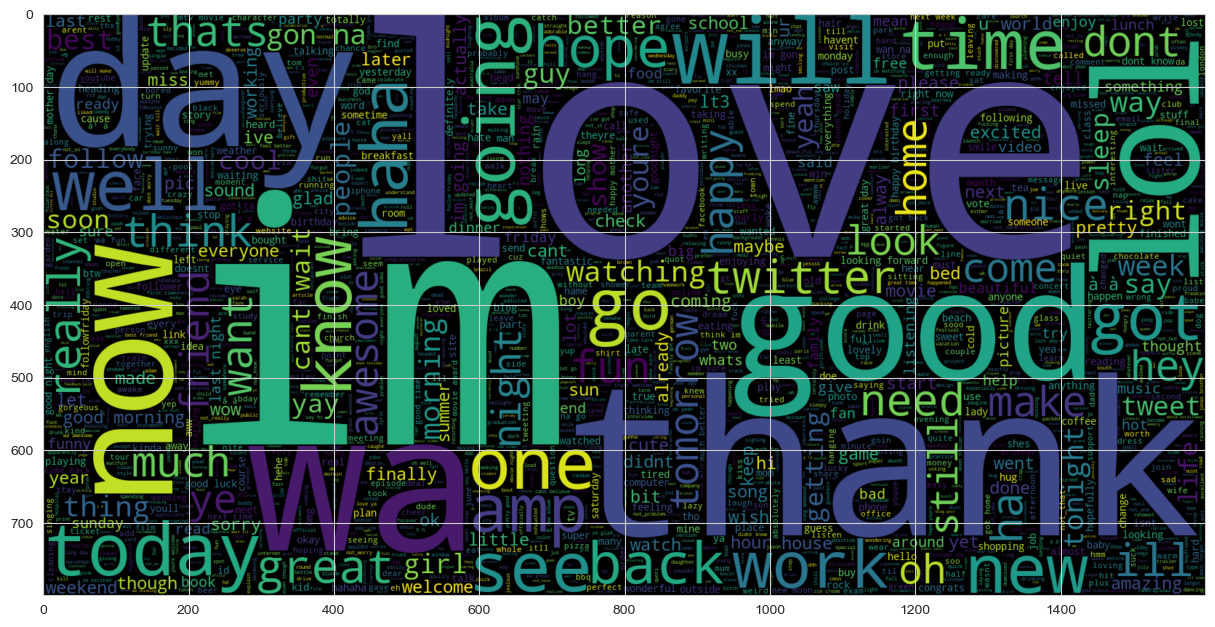

In [24]:
# Word-Cloud for Positive tweets
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.polarity == 1].processed_tweets))
plt.imshow(wc , interpolation = 'bilinear')

In [25]:
# Vectorization and Splitting the dat
X = data['processed_tweets'].values
y = data['polarity'].values

print(X.shape)
print(y.shape)

(20000,)
(20000,)


In [26]:
# Convert text to word frequency vectors
#Convert a collection of raw documents to a matrix of TF-IDF features.
vector = TfidfVectorizer(sublinear_tf=True)
X = vector.fit_transform(X)
print(f'Vector fitted.')
print('No. of feature_words: ', len(vector.get_feature_names_out()))

print(vector.get_feature_names_out()[:10])

Vector fitted.
No. of feature_words:  22555
['000' '0001am' '0074' '00g' '02' '0202' '02r96' '03' '034392' '04']


In [27]:
print(X.shape)
print(y.shape)

(20000, 22555)
(20000,)


# Traning preprocessing

In [28]:
# Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=101)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (16000, 22555)
y_train (16000,)
X_test (4000, 22555)
y_test (4000,)


In [29]:
# Model evaluating function
def model_Evaluate(model):
    #accuracy of model on training data
    acc_train=model.score(X_train, y_train)
    #accuracy of model on test data
    acc_test=model.score(X_test, y_test)

    print('Accuracy of model on training data : {}'.format(acc_train*100))
    print('Accuracy of model on testing data : {} \n'.format(acc_test*100))

    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))

    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

# Machine Learning Methods

Accuracy of model on training data : 85.125
Accuracy of model on testing data : 75.125 

              precision    recall  f1-score   support

           0       0.76      0.73      0.75      1997
           1       0.74      0.77      0.76      2003

    accuracy                           0.75      4000
   macro avg       0.75      0.75      0.75      4000
weighted avg       0.75      0.75      0.75      4000



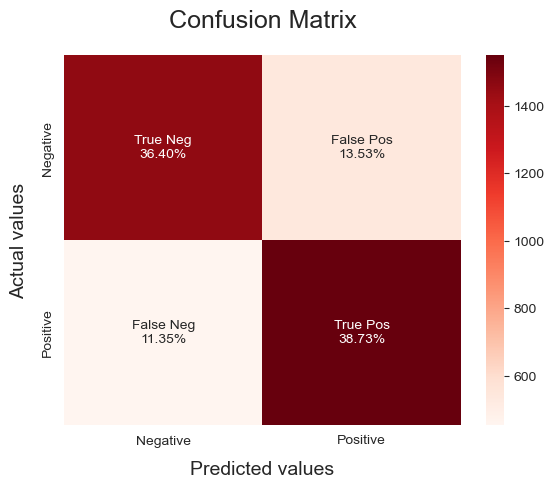

In [30]:
# Logistic Regression
lg = LogisticRegression()
history=lg.fit(X_train, y_train)
model_Evaluate(lg)

Accuracy of model on training data : 94.825
Accuracy of model on testing data : 73.275 

              precision    recall  f1-score   support

           0       0.75      0.71      0.73      1997
           1       0.72      0.76      0.74      2003

    accuracy                           0.73      4000
   macro avg       0.73      0.73      0.73      4000
weighted avg       0.73      0.73      0.73      4000



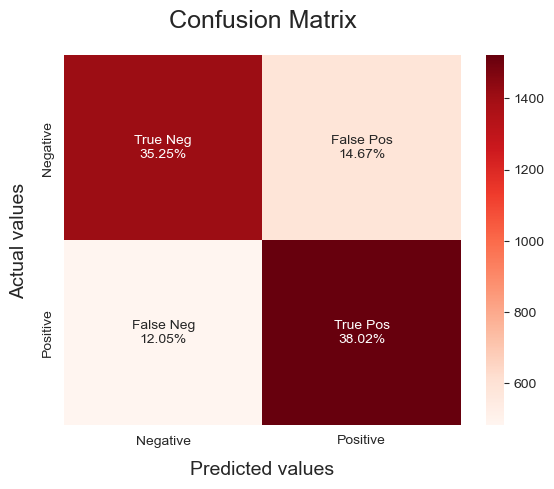

In [31]:
# Linear SVM
svm = LinearSVC()
svm.fit(X_train, y_train)
model_Evaluate(svm)

Accuracy of model on training data : 86.425
Accuracy of model on testing data : 71.675 

              precision    recall  f1-score   support

           0       0.74      0.67      0.70      1997
           1       0.70      0.76      0.73      2003

    accuracy                           0.72      4000
   macro avg       0.72      0.72      0.72      4000
weighted avg       0.72      0.72      0.72      4000



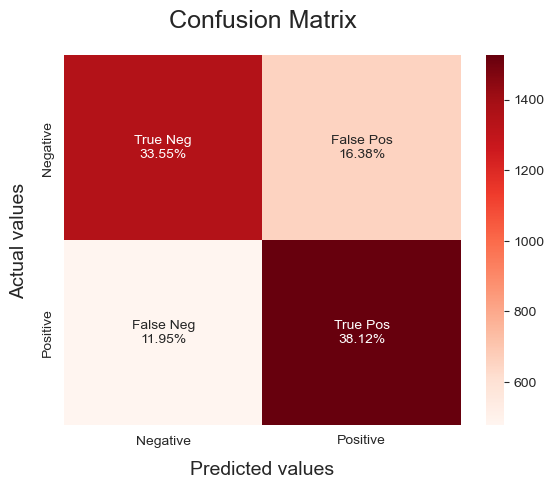

In [32]:
# Random Forest
rf = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', max_depth=50)
rf.fit(X_train, y_train)
model_Evaluate(rf)

Accuracy of model on training data : 88.02499999999999
Accuracy of model on testing data : 74.05000000000001 

              precision    recall  f1-score   support

           0       0.75      0.72      0.73      1997
           1       0.73      0.76      0.75      2003

    accuracy                           0.74      4000
   macro avg       0.74      0.74      0.74      4000
weighted avg       0.74      0.74      0.74      4000



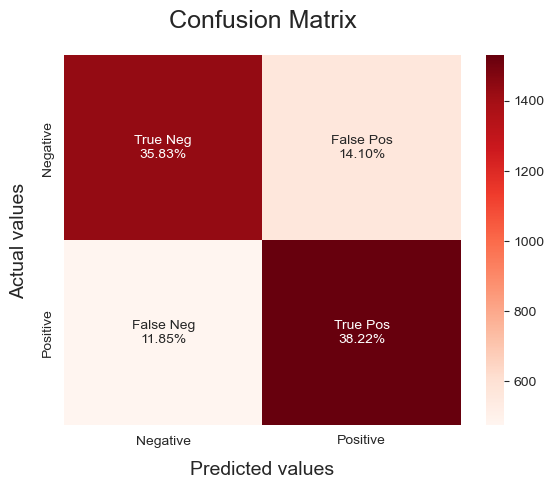

In [33]:
# Naive Bayes
nb = BernoulliNB()
nb.fit(X_train, y_train)
model_Evaluate(nb)

# RNN - LSTM

In [34]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import re
import keras
from keras import regularizers
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint


## Converting text data into sequences

In [43]:
# Define the 5000 most common words
max_words = 5000
# Define the maximum length of each sequence (number of words per tweet)
max_len = 200

# Initialize the tokenizer, keeping only the top 'max_words' most frequent words
tokenizer = Tokenizer(num_words=max_words)
# Fit the tokenizer on the processed tweets to build the word index
tokenizer.fit_on_texts(data.processed_tweets)
# Convert each tweet (text) into a sequence of integer indices based on the word index
sequences = tokenizer.texts_to_sequences(data.processed_tweets)

# Pad or truncate all sequences to the same length ('max_len')
# - If a sequence is shorter than 'max_len', it will be padded with zeros at the beginning.
# - If a sequence is longer than 'max_len', it will be truncated from the beginning.
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...   35    6  302]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...  740 1368 1816]
 ...
 [   0    0    0 ... 1560 2797 2063]
 [   0    0    0 ...  716   10 1785]
 [   0    0    0 ...  105    1  652]]


## Split Traning and Test data

In [44]:
train_data, test_data, train_label, test_label = train_test_split(tweets, data.polarity.values, test_size=0.2, random_state=101)

## Creating and Traning LSTM Model

In [45]:
# Initialize a sequential model
model2 = Sequential()

# Embedding layer: Converts word indices into dense vectors of fixed size
# - max_words: Vocabulary size (5000 words)
# - 128: Each word is represented as a 128-dimensional vector
model2.add(layers.Embedding(max_words, 128))

# LSTM layer: Captures sequential dependencies in the text data
# - 64: Number of LSTM units (memory cells)
# - dropout=0.5: Randomly drops 50% of connections to prevent overfitting
model2.add(layers.LSTM(64,dropout=0.5))

# Hidden layers with ReLU activation
model2.add(layers.Dense(16, activation='relu'))  # First hidden layer with 16 neurons
model2.add(layers.Dense(8, activation='relu'))   # Second hidden layer with 8 neurons

# Output layer with a sigmoid activation function for binary classification
model2.add(layers.Dense(1,activation='sigmoid'))

# Compile the model
# - optimizer='adam': Adam optimizer for efficient training
# - loss='binary_crossentropy': Loss function for binary classification
# - metrics=['accuracy']: Evaluates model performance using accuracy
model2.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

# Define a checkpoint callback to save the best model during training
checkpoint2 = ModelCheckpoint(
    "rnn_model.keras",  # Save the model to this file
    monitor='val_accuracy',  # Monitor validation accuracy
    verbose=1,  # Print updates during training
    save_best_only=False,  # Save only the model with the highest validation accuracy
    mode='auto',  # Automatically determine whether to maximize or minimize the monitored metric
    save_weights_only=False,  # Save the entire model (not just the weights)
    save_freq='epoch'  # Save the model after every epoch
)

# Train the model on the training data
history = model2.fit(
    train_data, train_label,  # Training data and labels
    epochs=10,  # Train for 10 epochs
    validation_data=(test_data, test_label),  # Use test data for validation
    callbacks=[checkpoint2]  # Use the checkpoint callback to save the best model
)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6170 - loss: 0.6371
Epoch 1: saving model to rnn_model.keras
500/500 ━━━━━━━━━━━━━━━━━━━━ 39s 75ms/step - accuracy: 0.6172 - loss: 0.6370 - val_accuracy: 0.7310 - val_loss: 0.5333
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.7999 - loss: 0.4421
Epoch 2: saving model to rnn_model.keras
500/500 ━━━━━━━━━━━━━━━━━━━━ 36s 72ms/step - accuracy: 0.7999 - loss: 0.4421 - val_accuracy: 0.7437 - val_loss: 0.5182
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.8317 - loss: 0.3852
Epoch 3: saving model to rnn_model.keras
500/500 ━━━━━━━━━━━━━━━━━━━━ 36s 72ms/step - accuracy: 0.8317 - loss: 0.3852 - val_accuracy: 0.7460 - val_loss: 0.5368
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.8559 - loss: 0.3346
Epoch 4: saving model to rnn_model.keras
500/500 ━━━━━━━━━━━━━━━━━━━━ 36s 73ms/step - accuracy: 0.8559 - loss: 0.3346 - val_accuracy: 0.7410 - val_loss: 0.5993
Epoch 5/10
5

In [46]:
model = keras.models.load_model('rnn_model.keras')
model.summary()
print("Optimizer:", model.optimizer)
print("Loss function:", model.loss)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (32, 200, 128)         │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (32, 64)               │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (32, 16)               │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (32, 8)                │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (32, 1)                │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,071,781 (7.90 MB)

 Trainable params: 690,593 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,381,188 (5.27 MB)

Optimizer: <keras.src.optimizers.adam.Adam object at 0x378f5edc0>
Loss function: binary_crossentropy


In [47]:
test_loss, test_accuracy = model.evaluate(test_data, test_label)
print(f'Test Accuracy: {test_accuracy:.4f}')

125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.7116 - loss: 0.9639
Test Accuracy: 0.7117


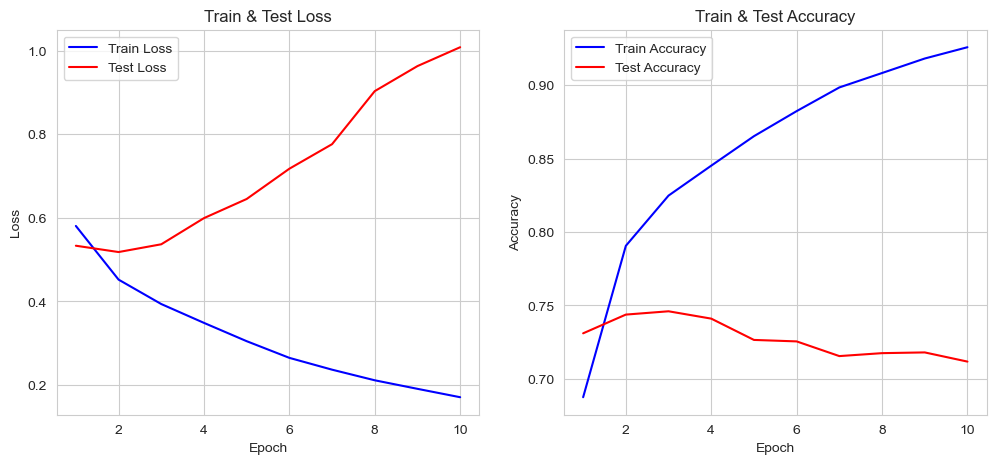

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(range(1, len(history.history['loss']) + 1), history.history['loss'], label='Train Loss', color='blue')
axes[0].plot(range(1, len(history.history['val_loss']) + 1), history.history['val_loss'], label='Test Loss', color='red')
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Loss")
axes[0].set_title("Train & Test Loss")
axes[0].legend()

axes[1].plot(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'], label='Train Accuracy', color='blue')
axes[1].plot(range(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'], label='Test Accuracy', color='red')
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Accuracy")
axes[1].set_title("Train & Test Accuracy")
axes[1].legend()

## Test the Model

In [49]:
def testModel(model, text):
    # model = keras.models.load_model('rnn_model.keras')
    sequence = tokenizer.texts_to_sequences([text])
    test = pad_sequences(sequence, maxlen=max_len)
    pred = model.predict(test)
    pred_value = pred[0][0]
    print(f'Prediction: {pred_value * 100:.2f}%')

    if pred_value > 0.5:
        print('Positive:', text)
    else:
        print('Negative:', text)

In [50]:
testModel(model2,str('this data science article is the worst ever'))
testModel(model2,str('this data science article is the best ever'))
testModel(model2,str('I had a bad day at work.'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
Prediction: 0.02%
Negative: this data science article is the worst ever
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Prediction: 99.47%
Positive: this data science article is the best ever
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Prediction: 0.90%
Negative: I had a bad day at work.


# Model Saving, Loading and Prediction

In [139]:
import pickle

# Save Vectorizer
file = open('vectoriser.pickle','wb')
pickle.dump(vector, file)
file.close()

# Save the trained classifier
file = open('logisticRegression.pickle','wb')
pickle.dump(lg, file)
file.close()

file = open('SVM.pickle','wb')
pickle.dump(svm, file)
file.close()

file = open('RandomForest.pickle','wb')
pickle.dump(rf, file)
file.close()

file = open('NaivesBayes.pickle','wb')
pickle.dump(nb, file)
file.close()

In [140]:
# Predict using saved model
def load_models():
    # Load the vectoriser.
    file = open('vectoriser.pickle', 'rb')
    vectoriser = pickle.load(file)
    file.close()
    # Load the LR Model.
    file = open('logisticRegression.pickle', 'rb')
    lg = pickle.load(file)
    file.close()
    return vectoriser, lg

In [141]:
def predict(vectoriser, model, text):
    # Predict the sentiment
    processes_text=[process_tweets(sen) for sen in text]
    textdata = vectoriser.transform(processes_text)
    sentiment = model.predict(textdata)

    # Make a list of text with sentiment.
    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))
    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(data, columns = ['text','sentiment'])
    df = df.replace([0,1], ["Negative","Positive"])
    return df

In [142]:
if __name__=="__main__":
    # Loading the models.
    vectoriser, lg = load_models()

    # Text to classify should be in a list.
    text = ["I love machine learning",
            "Work is too hectic.",
            "Mr.Sharama, I feel so good"]

    df = predict(vectoriser, lg, text)
    print(df.head())

                         text sentiment
0     I love machine learning  Positive
1         Work is too hectic.  Negative
2  Mr.Sharama, I feel so good  Positive
